In [184]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [185]:
#TEST_FILE = "/Users/chris/Dev/cod_records/aws/extracted/31829_B016711/31829_B016711-00000.jpg"
TEST_FILE = "/Users/chris/Dev/cod_records/george circumstance of death.jpg"

In [186]:
img = cv2.imread(TEST_FILE)

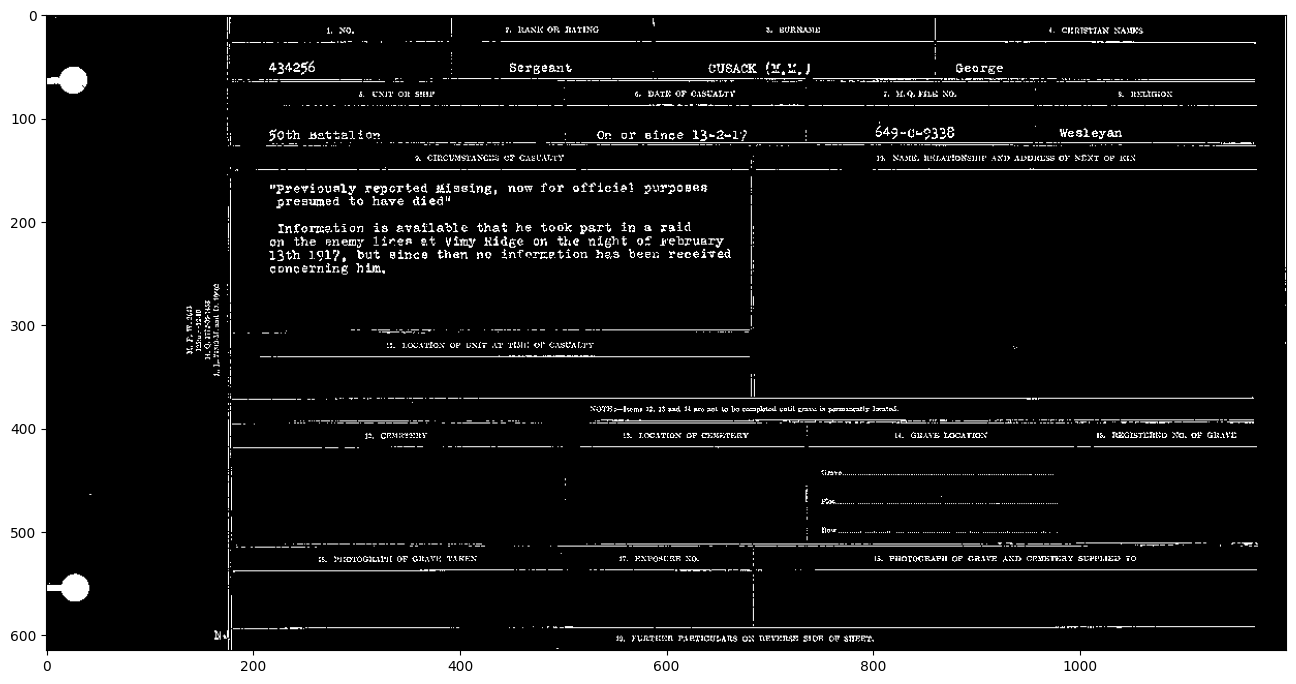

In [187]:
# current thresholding algo
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')

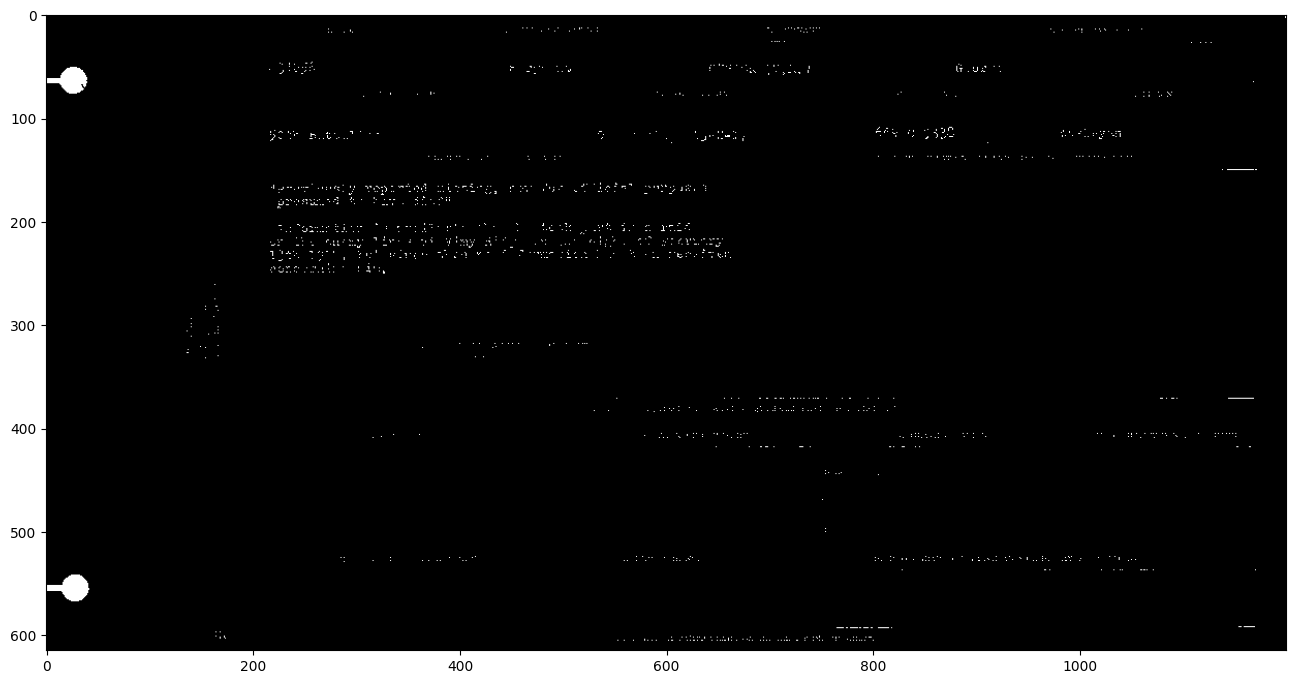

In [188]:
# current thresholding algo
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 45, 60, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

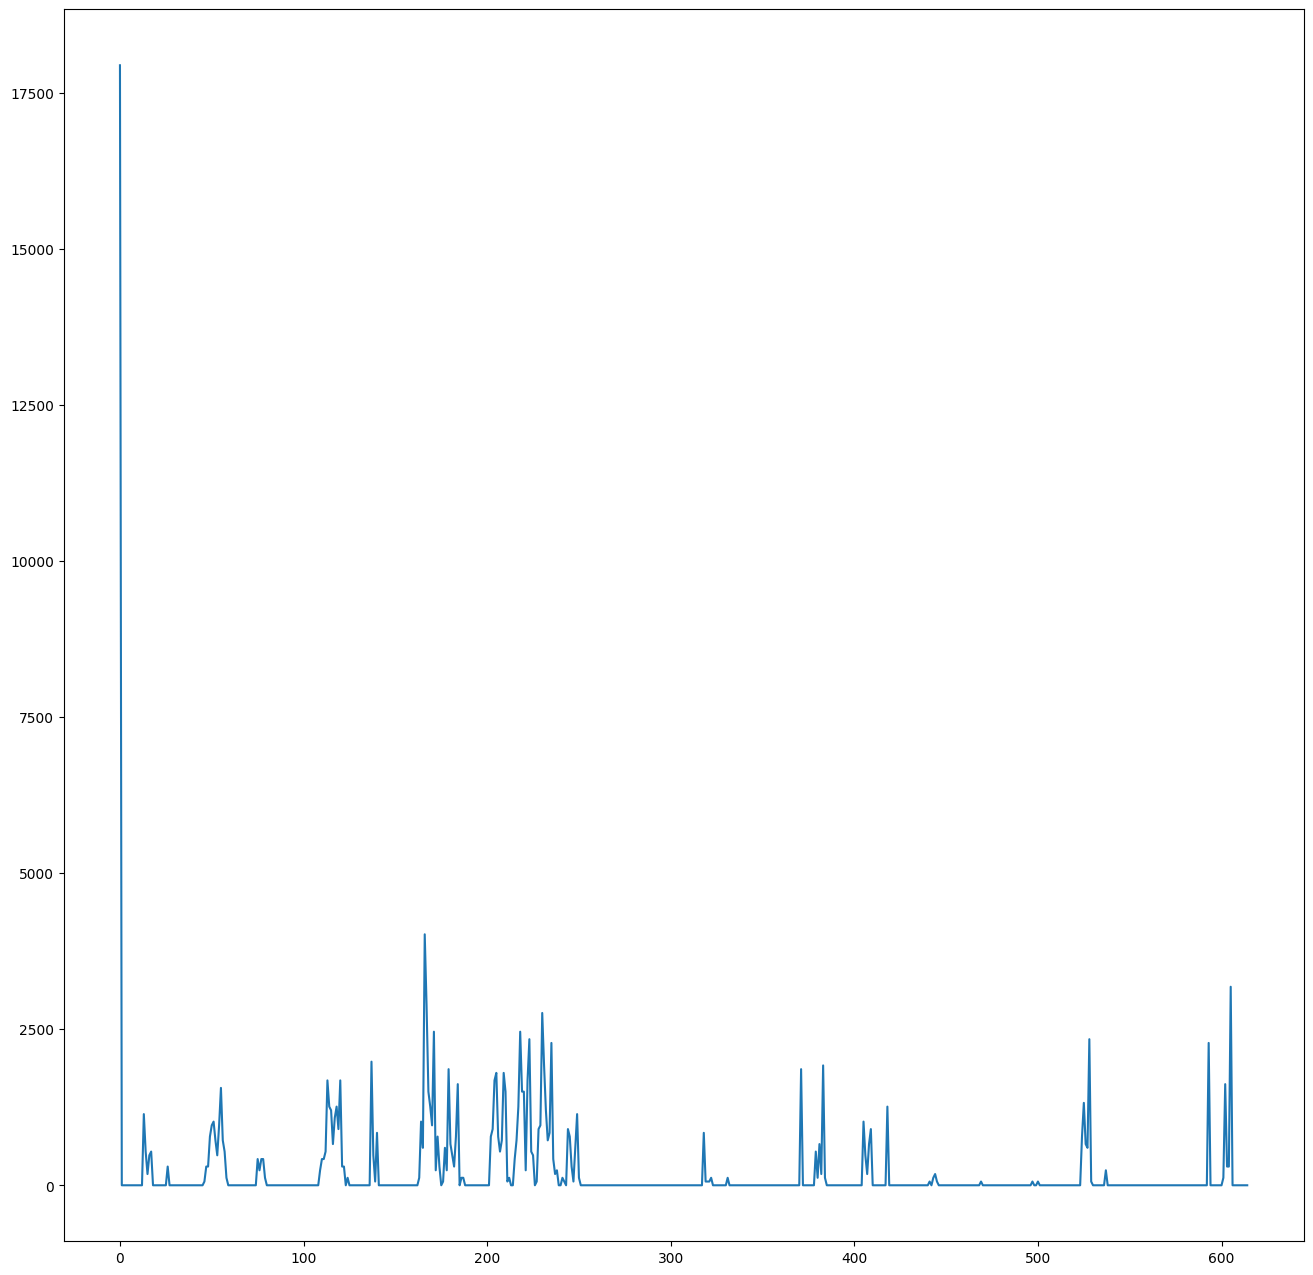

In [189]:
row_sums = [np.sum(row[200:1000]) for row in thresh]
plt.plot(row_sums)

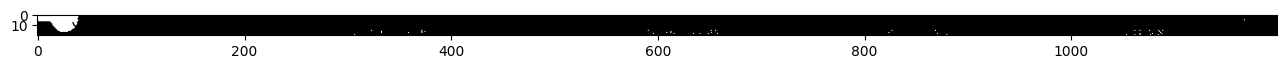

In [190]:
plt.imshow(thresh[60:80], cmap='gray')

In [191]:
# reseize
size = (img.shape[1] * 4, img.shape[0] * 4)
img = cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)

In [192]:
plt.rcParams['figure.figsize'] = [16, 16]

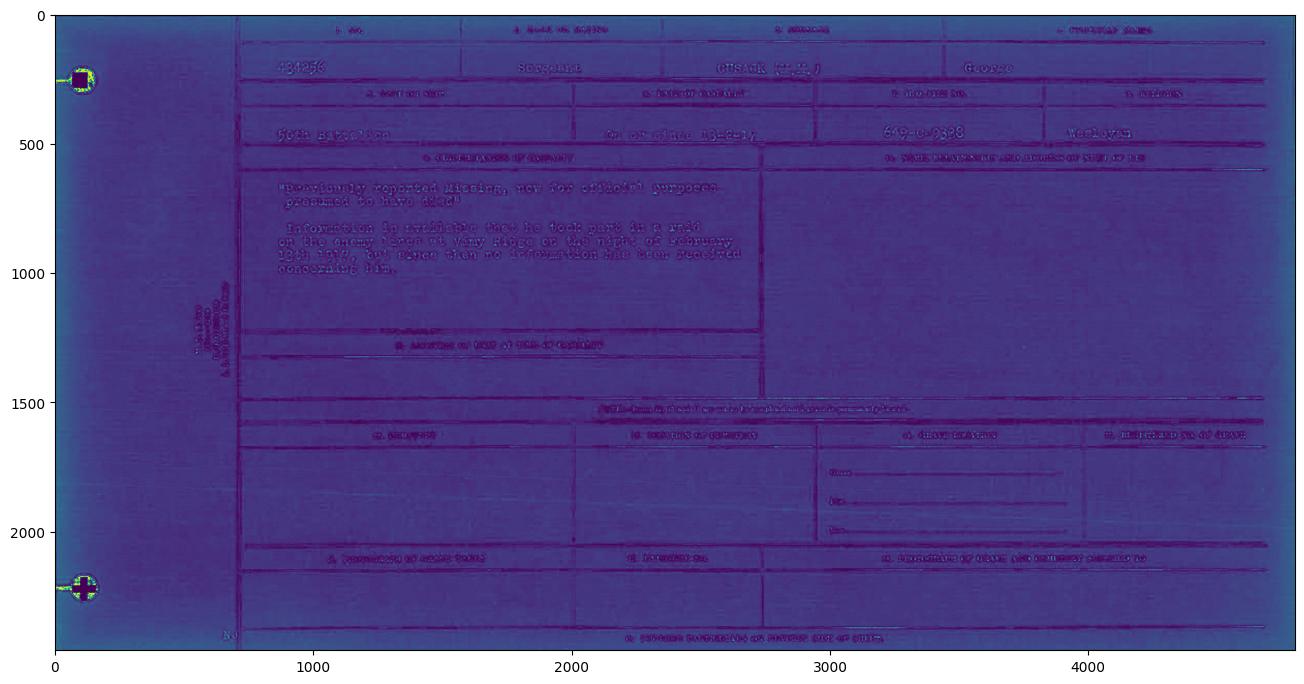

In [193]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
saturation = hsv[:, :, 1]
plt.imshow(saturation)

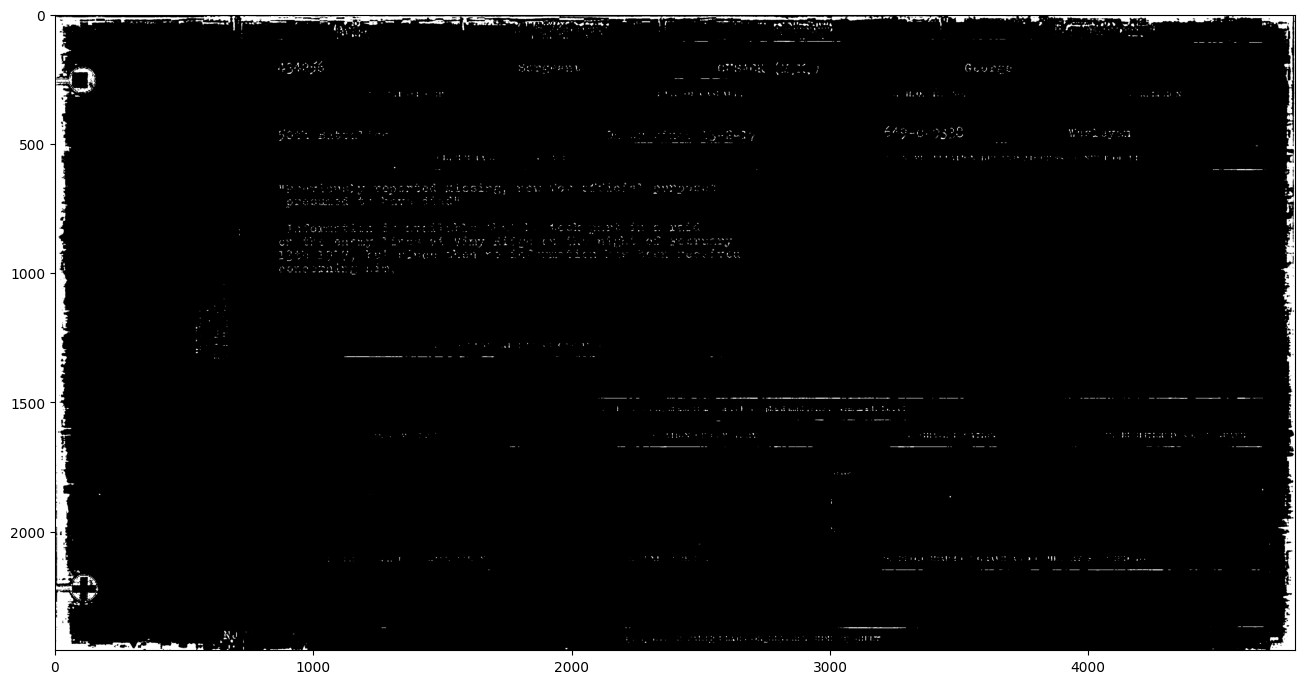

In [194]:
#saturation_thresh = cv2.threshold(saturation, 130, 255, cv2.THRESH_BINARY)[1]
saturation_thresh = cv2.threshold(saturation, 70, 255, cv2.THRESH_BINARY)[1]
plt.imshow(saturation_thresh, cmap='gray')

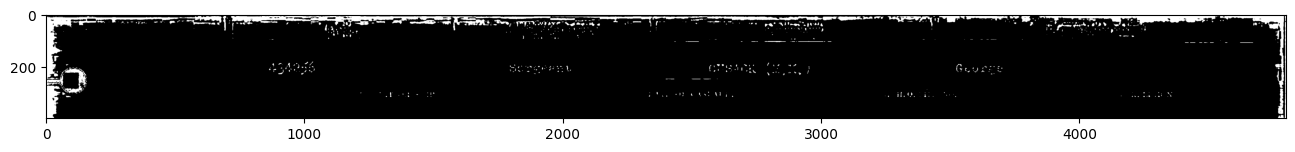

In [195]:
slice = saturation_thresh[:400]
plt.imshow(slice, cmap='gray')

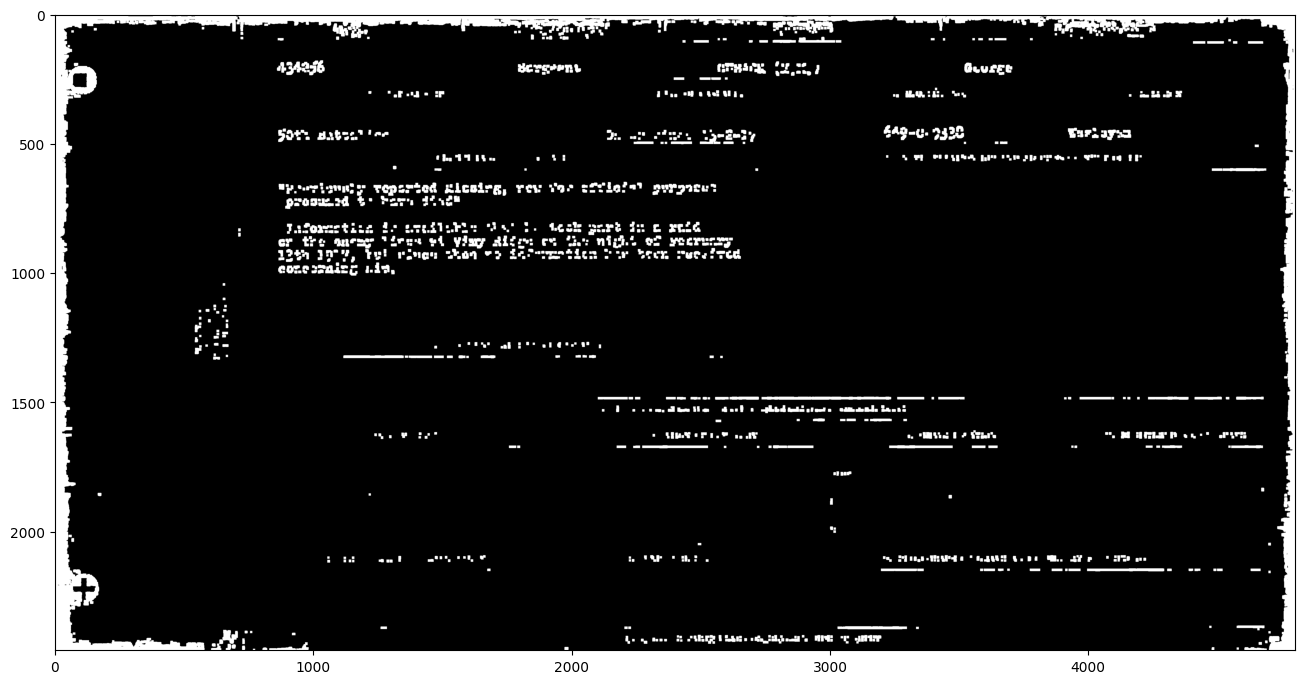

In [196]:
dilated = cv2.dilate(saturation_thresh.copy(), None, iterations=4)
plt.imshow(dilated, cmap='gray')

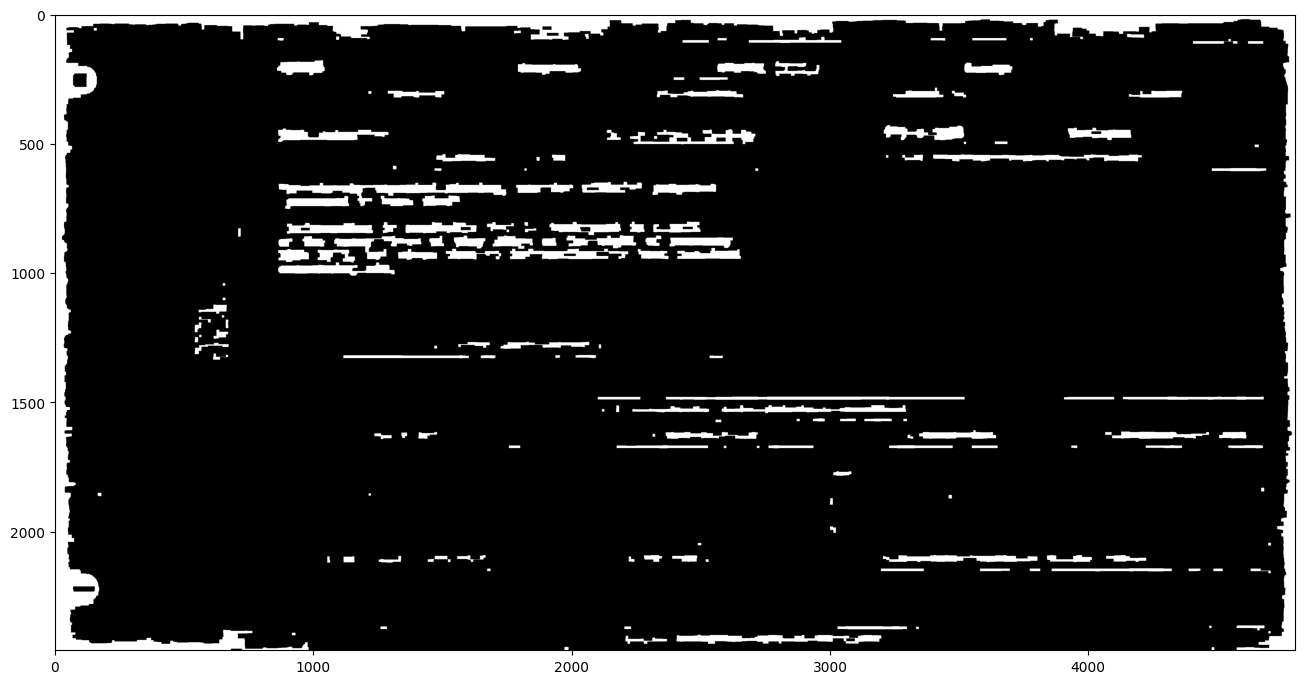

In [197]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (33,9))
closing = cv2.morphologyEx(dilated.copy(), cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

180
0


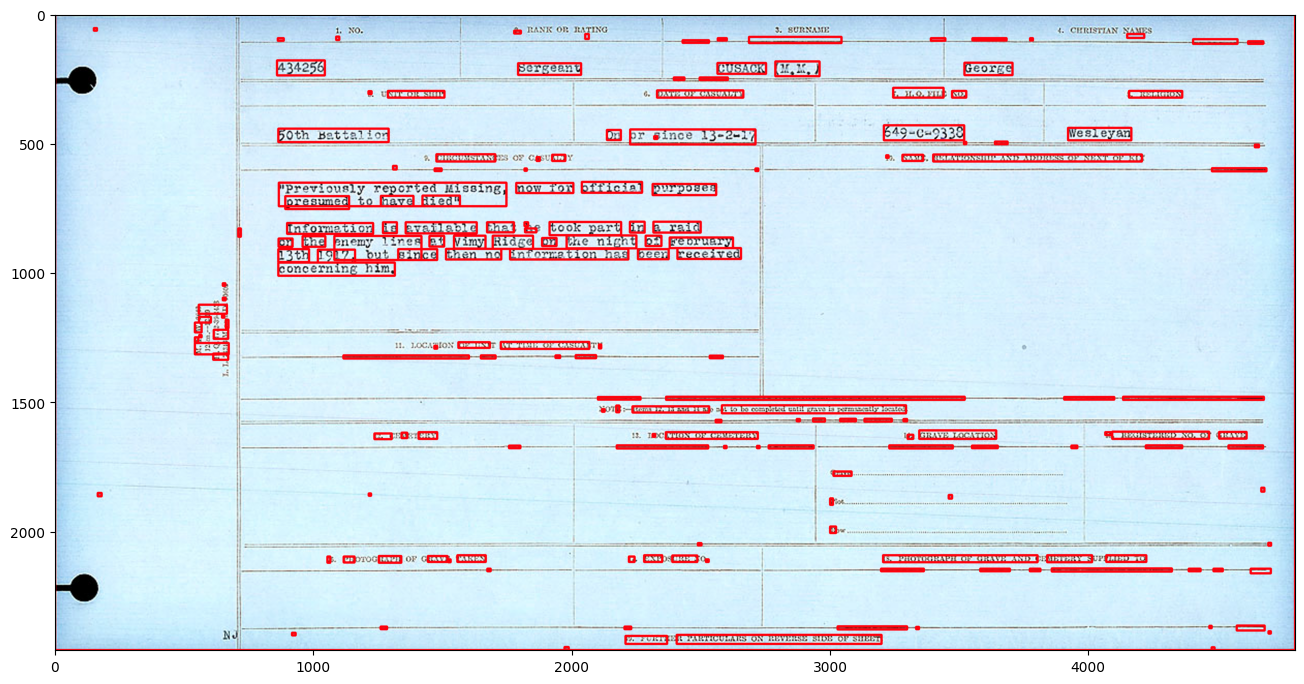

In [198]:
img2 = img.copy()

cnts = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(len(cnts))
skipped = 0

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w < 2 or h < 2:
        skipped += 1
        continue
    cv2.rectangle(img2, (x, y), (x + w, y + h), (255,0,12), 8)
print(skipped)
plt.imshow(img2)

180
137


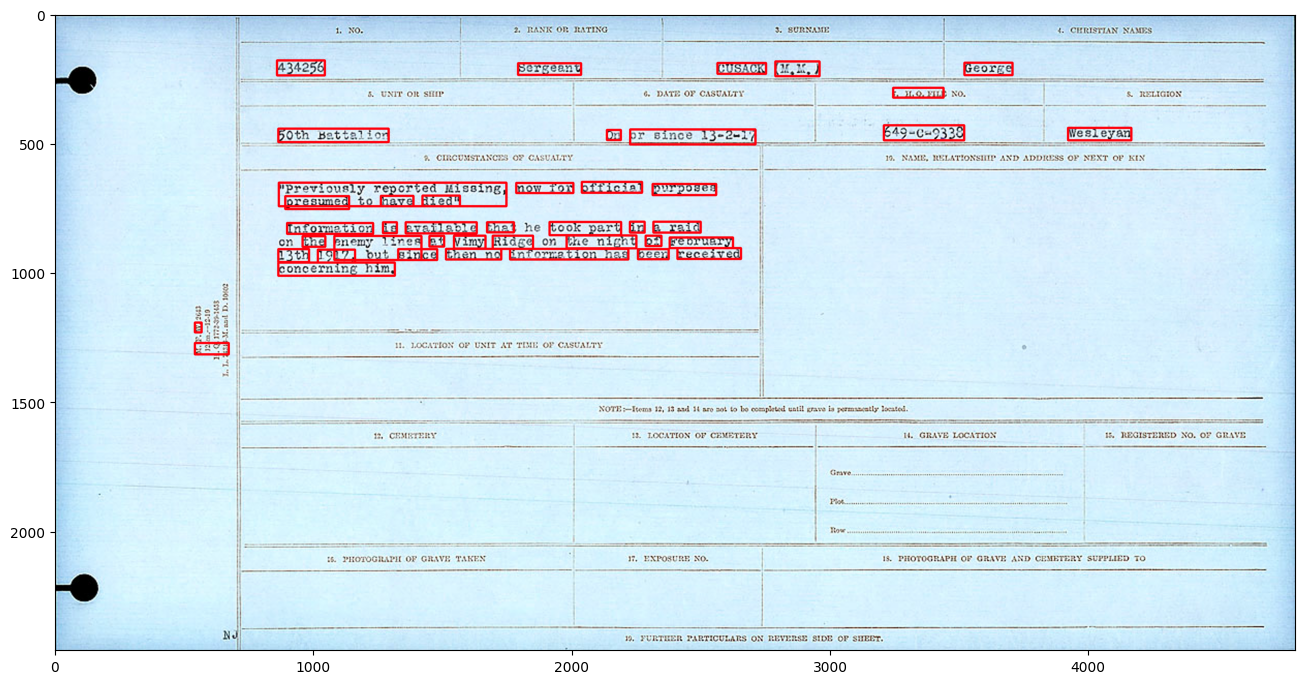

In [199]:
img3 = img.copy()

cnts = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(len(cnts))
skipped = 0

rects = [cv2.boundingRect(c) for c in cnts]
rects.sort(key=lambda r: (r[1], r[0]))  # sort by y, then x

for (x,y,w,h) in rects:
    if h < 36 or h > 100:
        skipped += 1
        continue
    cv2.rectangle(img3, (x, y), (x + w, y + h), (255,0,12), 8)
print(skipped)
plt.imshow(img3)